# **XAI Techniques in Supervised Learning** - Advanced Topics on Machine Learning (M.IA009) 2024/2025

The goal of this project is to explore the insights provided by different explainable artificial intelligence (XAI) techniques in a supervised learning context on tabular data.

#### **Table of Contents**
* [1. Pre-Modeling](#chapter1)
    * [Understanding the Data](#section_1_1)
    * [Dealing with Missing Data](#section_1_2)
* [2. White-Box Model](#chapter2)
    * [Encoding the Data](#section_2_1)
    * [Decision Tree](#section_2_2)
* [3. Black-Box Model](#chapter3)
    * [Simplification-Based Technique](#section_3_1)
    * [Feature-Based Techniques](#section_3_2)
    * [Example-Based Technique ](#section_3_3)

## **1. Pre-Modeling** <a class="anchor" id="chapter1"></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:
ds = pd.read_csv("portugal_listinigs.csv")

/var/folders/50/dpngyqjs3h1d04k0k_thn7j00000gn/T/ipykernel_79541/4062222546.py:1: DtypeWarning: Columns (9,10,12,13,14,15,16,20) have mixed types. Specify dtype option on import or set low_memory=False.
  ds = pd.read_csv("portugal_listinigs.csv")


In [4]:
ds

,Price,District,City,Town,Type,EnergyCertificate,GrossArea,TotalArea,Parking,HasParking,...,Elevator,ElectricCarsCharging,TotalRooms,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms
0,780000.0,Vila Real,Valpaços,Carrazedo de Montenegro e Curros,Farm,NC,200.0,552450.0,0.0,False,...,False,NaN,NaN,NaN,NaN,NaN,120.0,NaN,NaN,0.0
1,223000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,NaN,81.0,1.0,True,...,True,NaN,2.0,NaN,NaN,NaN,81.0,NaN,NaN,2.0
2,228000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,NaN,108.0,1.0,True,...,True,NaN,2.0,NaN,NaN,NaN,108.0,NaN,NaN,2.0
3,250000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,NaN,114.0,1.0,True,...,True,NaN,2.0,NaN,NaN,NaN,114.0,NaN,NaN,0.0
4,250000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,NaN,114.0,1.0,True,...,True,NaN,2.0,NaN,NaN,NaN,114.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122218,140000.0,Viana do Castelo,Ponte da Barca,Vade (São Pedro),Apartment,E,NaN,72.0,0.0,NaN,...,False,False,2.0,1.0,0.0,Used,72.0,NaN,NaN,1.0
122219,168000.0,Viana do Castelo,Viana do Castelo,Areosa,Land,NC,NaN,NaN,0.0,NaN,...,False,False,NaN,NaN,0.0,NaN,NaN,5995.0,NaN,0.0
122220,130000.0,Vila Real,Chaves,Madalena e Samaiões,Apartment,NC,NaN,65.0,0.0,NaN,...,False,False,3.0,2.0,NaN,NaN,65.0,NaN,65.0,1.0
122221,130000.0,Vila Real,Chaves,Santa Maria Maior,Apartment,E,NaN,54.0,0.0,NaN,...,True,False,5.0,1.0,0.0,Like new,54.0,54.0,NaN,1.0


### **Understanding the Data** <a class="anchor" id="section_1_1"></a>

#### General Information

In [5]:
ds.shape

(122223, 25)

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122223 entries, 0 to 122222
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Price                  121942 non-null  float64
 1   District               122223 non-null  object 
 2   City                   122223 non-null  object 
 3   Town                   122221 non-null  object 
 4   Type                   122207 non-null  object 
 5   EnergyCertificate      122209 non-null  object 
 6   GrossArea              27638 non-null   float64
 7   TotalArea              115047 non-null  float64
 8   Parking                122029 non-null  float64
 9   HasParking             68215 non-null   object 
 10  Floor                  27929 non-null   object 
 11  ConstructionYear       79272 non-null   float64
 12  EnergyEfficiencyLevel  53976 non-null   object 
 13  PublishDate            20195 non-null   object 
 14  Garage                 53976 non-nul

Let's change the 'PublishDate' column to datetime Dtype:

In [7]:
ds['PublishDate'] = pd.to_datetime(ds['PublishDate'])

In [8]:
categorical_columns = ds.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns = ds.select_dtypes(include=['number']).columns.tolist()

#### Duplicates
Checking and removing the duplicates:

In [9]:
ds.duplicated().sum()

np.int64(7188)

In [10]:
ds.drop_duplicates()

,Price,District,City,Town,Type,EnergyCertificate,GrossArea,TotalArea,Parking,HasParking,...,Elevator,ElectricCarsCharging,TotalRooms,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms
0,780000.0,Vila Real,Valpaços,Carrazedo de Montenegro e Curros,Farm,NC,200.0,552450.0,0.0,False,...,False,NaN,NaN,NaN,NaN,NaN,120.0,NaN,NaN,0.0
1,223000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,NaN,81.0,1.0,True,...,True,NaN,2.0,NaN,NaN,NaN,81.0,NaN,NaN,2.0
2,228000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,NaN,108.0,1.0,True,...,True,NaN,2.0,NaN,NaN,NaN,108.0,NaN,NaN,2.0
3,250000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,NaN,114.0,1.0,True,...,True,NaN,2.0,NaN,NaN,NaN,114.0,NaN,NaN,0.0
4,250000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,NaN,114.0,1.0,True,...,True,NaN,2.0,NaN,NaN,NaN,114.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122218,140000.0,Viana do Castelo,Ponte da Barca,Vade (São Pedro),Apartment,E,NaN,72.0,0.0,NaN,...,False,False,2.0,1.0,0.0,Used,72.0,NaN,NaN,1.0
122219,168000.0,Viana do Castelo,Viana do Castelo,Areosa,Land,NC,NaN,NaN,0.0,NaN,...,False,False,NaN,NaN,0.0,NaN,NaN,5995.0,NaN,0.0
122220,130000.0,Vila Real,Chaves,Madalena e Samaiões,Apartment,NC,NaN,65.0,0.0,NaN,...,False,False,3.0,2.0,NaN,NaN,65.0,NaN,65.0,1.0
122221,130000.0,Vila Real,Chaves,Santa Maria Maior,Apartment,E,NaN,54.0,0.0,NaN,...,True,False,5.0,1.0,0.0,Like new,54.0,54.0,NaN,1.0


#### Missing Values
Percentage of null values in each column:

In [11]:
ds.isnull().mean()*100

Price                     0.229908
District                  0.000000
City                      0.000000
Town                      0.001636
Type                      0.013091
EnergyCertificate         0.011454
GrossArea                77.387235
TotalArea                 5.871235
Parking                   0.158726
HasParking               44.188082
Floor                    77.149145
ConstructionYear         35.141504
EnergyEfficiencyLevel    55.838099
PublishDate              83.476923
Garage                   55.838099
Elevator                  0.026182
ElectricCarsCharging     55.838099
TotalRooms               44.092356
NumberOfBedrooms         70.111190
NumberOfWC               60.943521
ConservationStatus       87.337899
LivingArea               23.337670
LotSize                  73.196534
BuiltArea                82.387930
NumberOfBathrooms         4.774061
dtype: float64

There are a lot of missing values that need to be treated.

#### Statistic Summary

In [12]:
ds.describe().T

,count,mean,min,25%,50%,75%,max,std
Price,121942.0,367015.416998,1.0,80000.0,200000.0,390000.0,1380000000.0,4001786.21458
GrossArea,27638.0,2789.732687,-7.0,100.0,164.0,294.0,12750000.0,115366.981143
TotalArea,115047.0,567991.296592,-7196067.0,94.0,170.0,569.0,61420071105.0,181131951.476586
Parking,122029.0,0.567439,0.0,0.0,0.0,1.0,3.0,0.867242
ConstructionYear,79272.0,1988.994613,1900.0,1972.0,1994.0,2008.0,2024.0,26.676406
PublishDate,20195,2024-07-10 22:08:30.810763520,2018-04-09 05:48:21.907000,2024-05-23 15:52:24.438500096,2024-08-15 08:23:25.512999936,2024-10-17 09:38:47.408499968,2024-11-22 20:32:23.053000,NaN
TotalRooms,68332.0,3.161667,0.0,2.0,3.0,4.0,2751.0,10.842609
NumberOfBedrooms,36531.0,2.680272,0.0,2.0,3.0,3.0,21.0,1.857529
NumberOfWC,47736.0,0.415682,-15.0,0.0,0.0,1.0,59.0,1.019128
LivingArea,93699.0,1495.452769,0.0,80.0,120.0,211.0,5429000.0,36616.861216


In [13]:
ds.describe(include=['object', 'category']).T

,count,unique,top,freq
District,122223,25,Lisboa,27950
City,122223,272,Lisboa,7524
Town,122221,2246,Albufeira e Olhos de Água,1372
Type,122207,21,Apartment,40851
EnergyCertificate,122209,12,NC,55322
HasParking,68215,2,False,37370
Floor,27929,19,Ground Floor,6973
EnergyEfficiencyLevel,53976,11,NC,25251
Garage,53976,2,False,44653
Elevator,122191,2,False,92477


- 'TotalArea', 'GrossArea' and 'BuiltArea' have negative values (check the corresponding min values). This doesn't make sense.
- 'NumberofBathrooms' and 'NumberofWC' also have negative values. This too doesn't make any sense.

We can see that in 'Price' (our target attribute) the min (1.0) and the max (1380000000.0) values are odd.

In [14]:
ds['Price'].nlargest(5)

58787     1.380000e+09
64208     3.600000e+07
82014     3.600000e+07
120667    2.500000e+07
64212     2.200000e+07
Name: Price, dtype: float64

In [15]:
ds.iloc[58801]

Price                     625000.0
District                      Faro
City                      Portimão
Town                         Alvor
Type                     Apartment
EnergyCertificate               A+
GrossArea                    140.0
TotalArea                    140.0
Parking                        2.0
HasParking                    True
Floor                    2nd Floor
ConstructionYear               NaN
EnergyEfficiencyLevel          NaN
PublishDate                    NaT
Garage                         NaN
Elevator                      True
ElectricCarsCharging           NaN
TotalRooms                     2.0
NumberOfBedrooms               NaN
NumberOfWC                     NaN
ConservationStatus             NaN
LivingArea                   120.0
LotSize                        NaN
BuiltArea                      NaN
NumberOfBathrooms              2.0
Name: 58801, dtype: object

In [16]:
ds['Price'].nsmallest(5)

114994      1.0
76042     100.0
54117     250.0
25580     300.0
50929     300.0
Name: Price, dtype: float64

In [17]:
ds.iloc[115016]

Price                                       12360.0
District                                       Faro
City                                   Castro Marim
Town                                        Azinhal
Type                                           Land
EnergyCertificate                                NC
GrossArea                                       NaN
TotalArea                                       NaN
Parking                                         0.0
HasParking                                      NaN
Floor                                           NaN
ConstructionYear                                NaN
EnergyEfficiencyLevel                            NC
PublishDate              2024-10-23 11:48:43.037000
Garage                                        False
Elevator                                      False
ElectricCarsCharging                          False
TotalRooms                                      NaN
NumberOfBedrooms                                NaN
NumberOfWC  

In [18]:
ds.drop(index=58801, inplace=True)

In [19]:
ds.drop(index=115016, inplace=True)

- We can see that max value for 'Price' is significantly bigger than the following biggest values. The instance that corresponds to that price value as a lot of nulls and some values that don't seem to make sense for that price point (total area of 538 and only 4 rooms?) . We remove that instance from our dataset. 
- The instance with price equal to 1.0 also doesn't make sense so we remove it from our data. 

#### Univariate Visualization

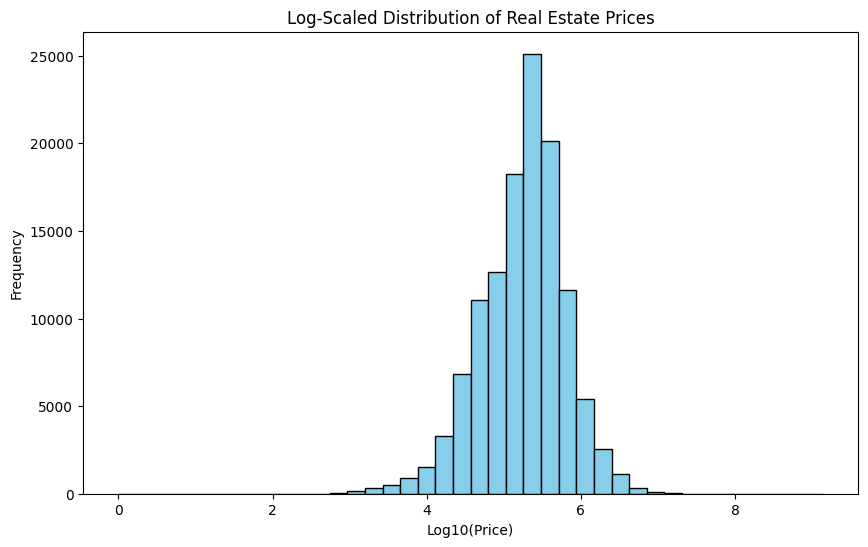

In [20]:
ds['Price_Log'] = np.log10(ds['Price'])

# Plot histogram
ds['Price_Log'].plot(kind='hist', bins=40, figsize=(10, 6), edgecolor='black', color='skyblue')

# Adjust labels
plt.xlabel('Log10(Price)')
plt.ylabel('Frequency')
plt.title('Log-Scaled Distribution of Real Estate Prices')
plt.show()

ds.drop('Price_Log', axis=1, inplace=True)

In [21]:
def plot_count_columns(dataset, columns, figsize=(20, 5), color='lightgreen', edgecolor='black', rotation=45, plots_per_row=3):
    num_columns = len(columns)
    rows = math.ceil(num_columns / plots_per_row)  # Calculate the number of rows
    fig, axes = plt.subplots(rows, plots_per_row, figsize=(figsize[0], figsize[1] * rows))
    
    # Flatten axes to simplify indexing (handles 1D or 2D axes arrays)
    axes = axes.flatten()
    
    for i, column in enumerate(columns):
        sns.countplot(ax=axes[i], x=column, data=dataset, color=color, edgecolor=edgecolor)
        axes[i].set_title(f'Count of {column} per Property')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=rotation)
    
    # Hide any unused subplots
    for j in range(len(columns), len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

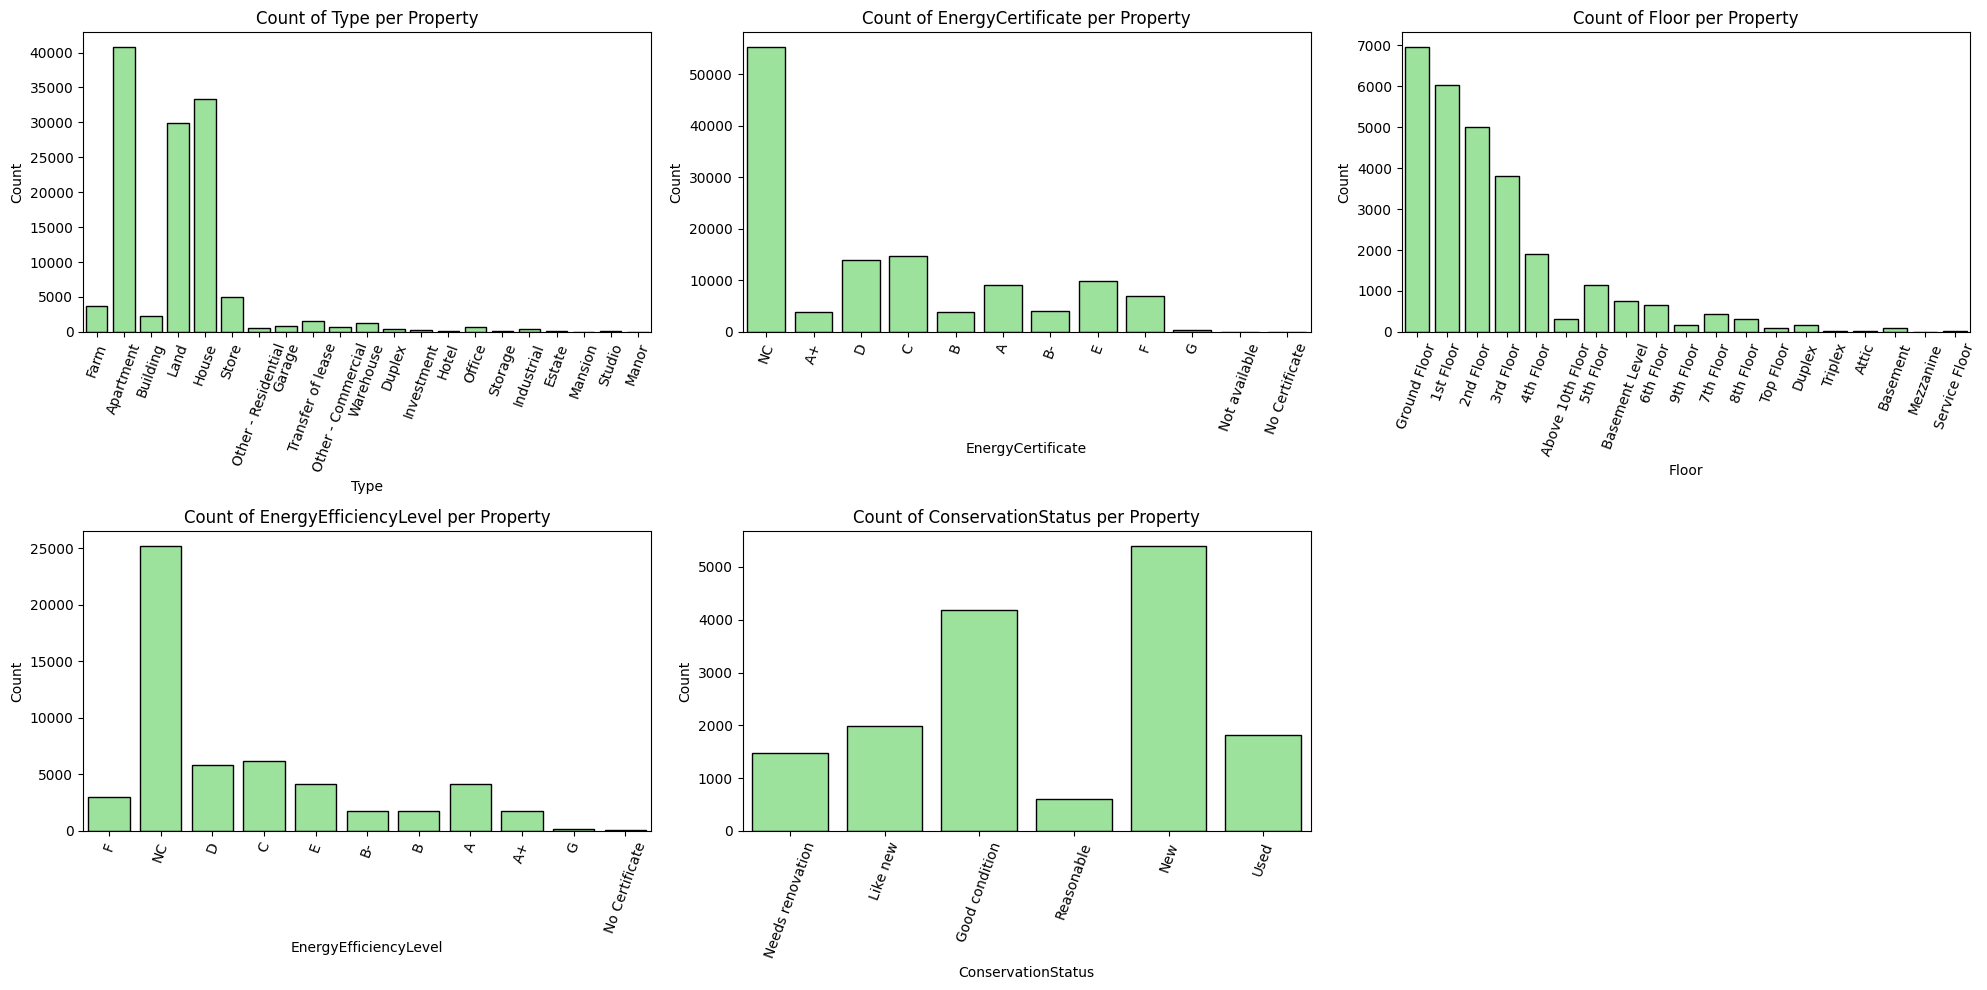

In [22]:
plot_count_columns(dataset=ds, columns=['Type','EnergyCertificate', 'Floor','EnergyEfficiencyLevel','ConservationStatus'], rotation=70, plots_per_row=3)

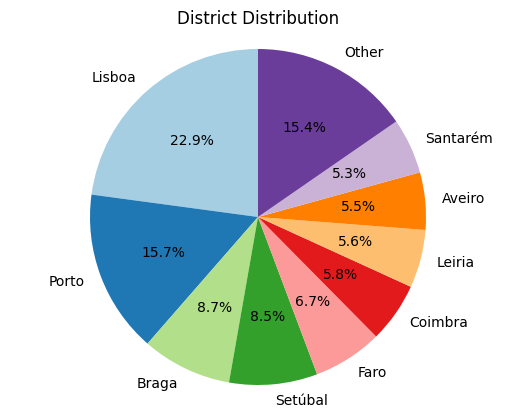

In [23]:
district_counts = ds['District'].value_counts()
total_count = district_counts.sum()
district_percentages = (district_counts / total_count) * 100

district_main = district_counts[district_percentages >= 5]
district_other = district_counts[district_percentages < 5].sum()

district_counts_final = pd.concat([district_main, pd.Series({'Other': district_other})])

fig, ax = plt.subplots()
ax.pie(district_counts_final.values, labels=district_counts_final.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('District Distribution')
plt.axis('equal')
plt.show()

- There is no apparent difference between 'EnergyCertificate' and 'EnergyEfficiencyLevel' columns.
- Also, there are different names for the same category. Not available=No Certificate=NC.
- Most properties are in Lisboa e Porto (as expected).

#### Multivariate Visualization

##### Correlation Analysis

a) Numerical Attributes

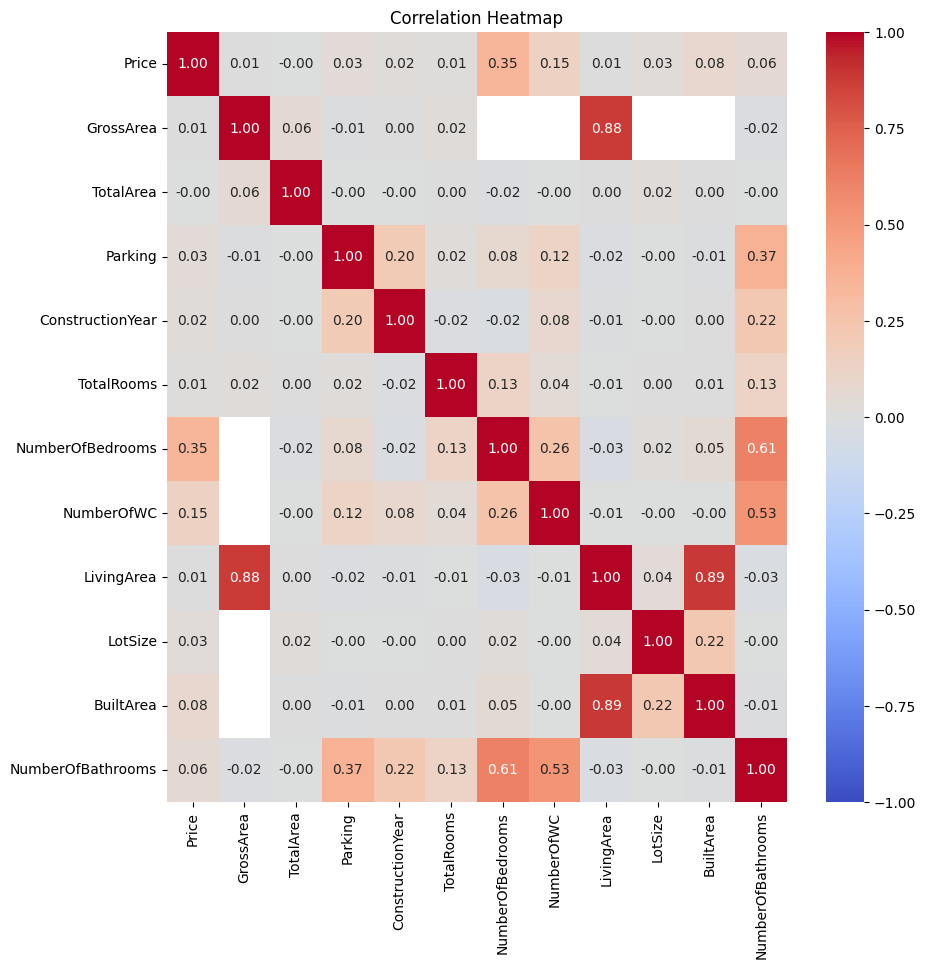

In [24]:
corr_matrix = ds[numerical_columns].corr(method='pearson') 

# Plot the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

### **Dealing with Missing Values** <a class="anchor" id="section_1_2"></a>

This dataset has a lot of columns with high percentages of missing values. Some of these missing values could be related with the type of property, for example, a land property is most likely not going to have a bathroom. Due to this high volatility of property types, each one with different important characteristics, we decided to only focus on apartments and houses.

In [25]:
df = ds[ds['Type'].isin(['Apartment', 'House'])]

df.to_csv("filtered_portugal_listings.csv", index=False)

In [26]:
df= pd.read_csv("filtered_portugal_listings.csv")

In [ ]:
df.head()

,Price,District,City,Town,Type,EnergyCertificate,GrossArea,TotalArea,Parking,HasParking,...,Elevator,ElectricCarsCharging,TotalRooms,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms
0,223000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,NaN,81.0,1.0,True,...,True,NaN,2.0,NaN,NaN,NaN,81.0,NaN,NaN,2.0
1,228000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,NaN,108.0,1.0,True,...,True,NaN,2.0,NaN,NaN,NaN,108.0,NaN,NaN,2.0
2,250000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,NaN,114.0,1.0,True,...,True,NaN,2.0,NaN,NaN,NaN,114.0,NaN,NaN,0.0
3,250000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,NaN,114.0,1.0,True,...,True,NaN,2.0,NaN,NaN,NaN,114.0,NaN,NaN,2.0
4,250000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,NaN,115.0,1.0,True,...,True,NaN,2.0,NaN,NaN,NaN,115.0,NaN,NaN,2.0


In [ ]:
df.shape

(74254, 25)

In [ ]:
df.isnull().mean().round(2) * 100

Price                     0.0
District                  0.0
City                      0.0
Town                      0.0
Type                      0.0
EnergyCertificate         0.0
GrossArea                72.0
TotalArea                 0.0
Parking                   0.0
HasParking               43.0
Floor                    67.0
ConstructionYear         14.0
EnergyEfficiencyLevel    57.0
PublishDate              82.0
Garage                   57.0
Elevator                  0.0
ElectricCarsCharging     57.0
TotalRooms               21.0
NumberOfBedrooms         57.0
NumberOfWC               62.0
ConservationStatus       83.0
LivingArea                0.0
LotSize                  80.0
BuiltArea                79.0
NumberOfBathrooms         1.0
dtype: float64

The percentages of missing values in the filtered dataset are not that different from the percentages in the original dataset, but with only 2 types of properties is easier to treat them. 

We started by removing columns with more than 50% missing values:

In [ ]:
threshold = 0.5  
df = df.loc[:, df.isnull().mean() < threshold]

In [ ]:
df.head()

,Price,District,City,Town,Type,EnergyCertificate,TotalArea,Parking,HasParking,ConstructionYear,Elevator,TotalRooms,LivingArea,NumberOfBathrooms
0,223000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,81.0,1.0,True,NaN,True,2.0,81.0,2.0
1,228000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,108.0,1.0,True,NaN,True,2.0,108.0,2.0
2,250000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,114.0,1.0,True,NaN,True,2.0,114.0,0.0
3,250000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,114.0,1.0,True,NaN,True,2.0,114.0,2.0
4,250000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,115.0,1.0,True,NaN,True,2.0,115.0,2.0


We suspect that 'HasParking' can be substitured by 'Parking', since if the value in 'Parking' is greater than 0.0 then 'HasParking' should always be True and vice-versa. Let's check that: 

In [ ]:
violations = df[
    ((df['Parking'] > 0.0) & (df['HasParking'] == False)) | 
    ((df['HasParking'] == True) & (df['Parking'] <= 0)) 
]

print(f"Total number of violations: {len(violations)}")

Total number of violations: 0


The information in 'HasParking' can be found in 'Parking', let's remove 'HasParking':

In [ ]:
df = df.drop(columns=['HasParking'])

In [ ]:
df.isnull().sum()

Price                  209
District                 0
City                     0
Town                     0
Type                     0
EnergyCertificate        0
TotalArea                9
Parking                138
ConstructionYear     10517
Elevator                 9
TotalRooms           15729
LivingArea              15
NumberOfBathrooms      399
dtype: int64

Due to the relatively low number of lines with null values, we decided to remove the those lines:

In [ ]:
df=df.dropna()

In [ ]:
df.shape

(49092, 13)

In [ ]:
df.head()

,Price,District,City,Town,Type,EnergyCertificate,TotalArea,Parking,ConstructionYear,Elevator,TotalRooms,LivingArea,NumberOfBathrooms
5,9500.0,Faro,Albufeira,Albufeira e Olhos de Água,Apartment,NC,27.0,0.0,1990.0,True,0.0,27.0,1.0
6,158000.0,Faro,Portimão,Portimão,Apartment,D,21953.0,1.0,1993.0,True,1.0,42.0,2.0
7,250000.0,Faro,Loulé,São Clemente,Apartment,C,85.0,0.0,2009.0,True,2.0,85.0,1.0
8,580000.0,Faro,Vila do Bispo,Budens,Apartment,D,84.0,1.0,2003.0,False,2.0,84.0,2.0
9,615000.0,Faro,Loulé,São Clemente,Apartment,D,218.0,2.0,1992.0,True,4.0,218.0,3.0


As seen before, 'EnergyCertificate' attribute has 2 different categories that could be one. 'NC' = 'No Certificate':

In [ ]:
df['EnergyCertificate'].unique()

array(['NC', 'D', 'C', 'B', 'A', 'B-', 'A+', 'E', 'F', 'G',
       'No Certificate'], dtype=object)

Let's change that:

In [ ]:
df['EnergyCertificate'] = df['EnergyCertificate'].replace({'No Certificate': 'NC'})

In [ ]:
df['EnergyCertificate'].unique()

array(['NC', 'D', 'C', 'B', 'A', 'B-', 'A+', 'E', 'F', 'G'], dtype=object)

#### **Data Analysis**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,49092.0,404094.517391,6.246255e+06,600.0,157000.0,249900.0,420000.0,1.380000e+09
TotalArea,49092.0,4898.131019,4.243926e+05,-271.0,86.0,133.0,274.0,5.621510e+07
Parking,49092.0,0.841807,9.776950e-01,0.0,0.0,1.0,1.0,3.000000e+00
ConstructionYear,49092.0,1989.454188,2.629272e+01,1900.0,1973.0,1994.0,2009.0,2.024000e+03
TotalRooms,49092.0,3.345942,1.255215e+01,0.0,2.0,3.0,4.0,2.751000e+03
LivingArea,49092.0,228.719751,4.299267e+03,0.0,75.0,108.0,166.0,4.703000e+05
NumberOfBathrooms,49092.0,2.028335,1.365821e+00,-1.0,1.0,2.0,3.0,2.400000e+01


In [ ]:
df.describe(include=['object', 'category']).T

,count,unique,top,freq
District,49092,23,Lisboa,14518
City,49092,267,Lisboa,4350
Town,49092,2072,Cascais e Estoril,898
Type,49092,2,Apartment,25592
EnergyCertificate,49092,10,D,9745
Elevator,49092,2,False,33303


There are still numerical features with negative values that don't make sense ('TotalArea' and 'NumberofBathrooms'). Let's module those columns:

In [ ]:
df['TotalArea'] = df['TotalArea'].abs()
df['NumberOfBathrooms'] = df['NumberOfBathrooms'].abs()

In [ ]:
categorical_columns=['Type', 'EnergyCertificate', 'District']

##### **Univariate Analysis**

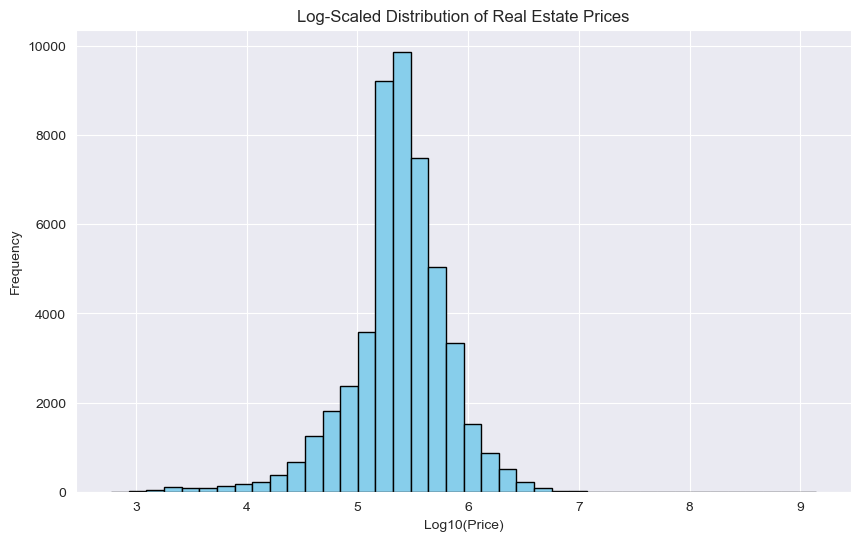

In [ ]:
np.log10(df['Price']).plot(kind='hist', bins=40, figsize=(10, 6), edgecolor='black', color='skyblue')

plt.xlabel('Log10(Price)')
plt.ylabel('Frequency')
plt.title('Log-Scaled Distribution of Real Estate Prices')
plt.show()

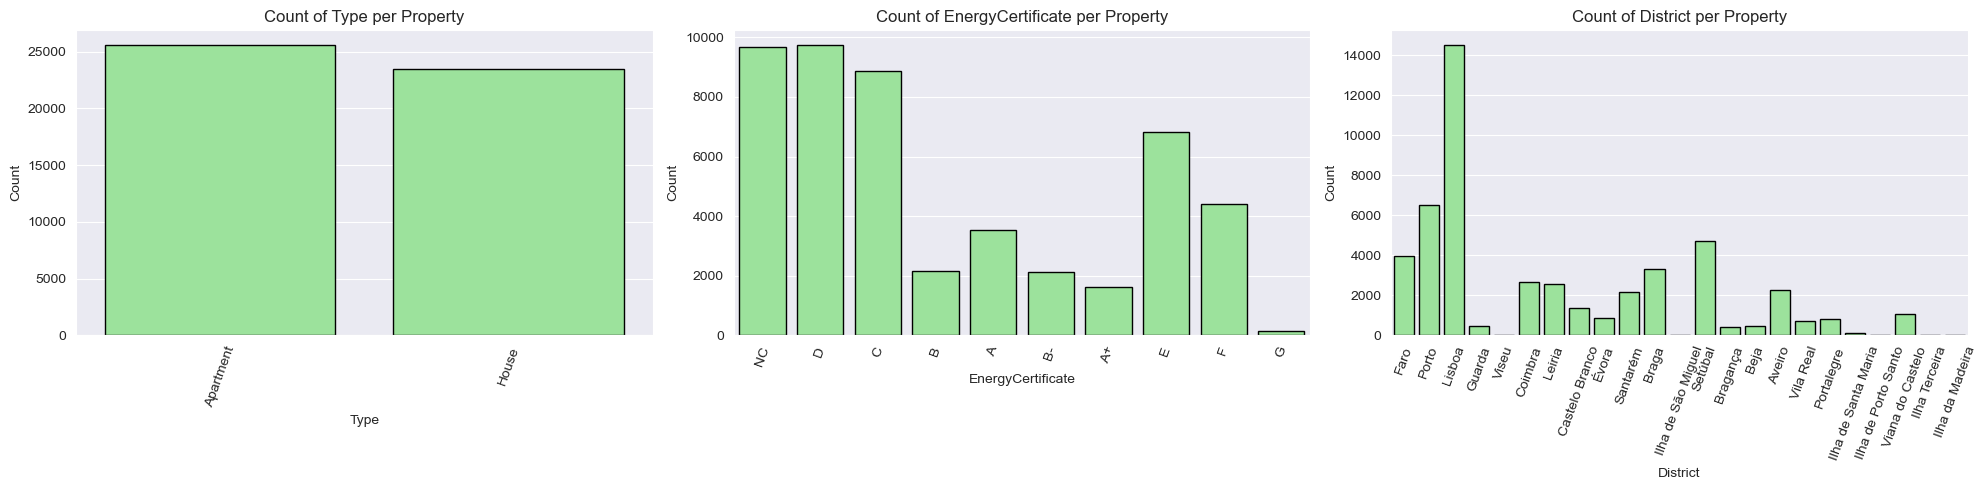

In [ ]:
plot_count_columns(dataset=df, columns=categorical_columns, rotation=70, plots_per_row=3)

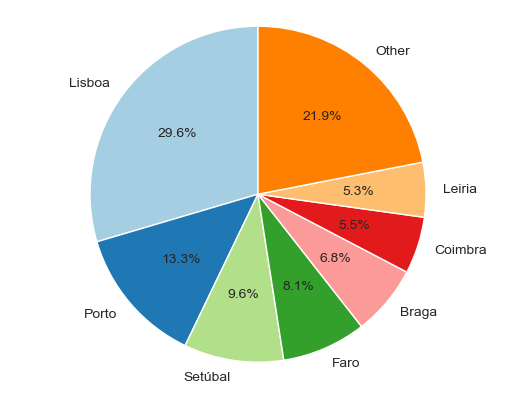

In [ ]:
district_counts = df['District'].value_counts()
total_count = district_counts.sum()
district_percentages = (district_counts / total_count) * 100

district_main = district_counts[district_percentages >= 5]
district_other = district_counts[district_percentages < 5].sum()

district_counts_final = pd.concat([district_main, pd.Series({'Other': district_other})])

fig, ax = plt.subplots()
ax.pie(district_counts_final.values, labels=district_counts_final.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

plt.axis('equal')
plt.show()

##### **Bivariate Analysis**

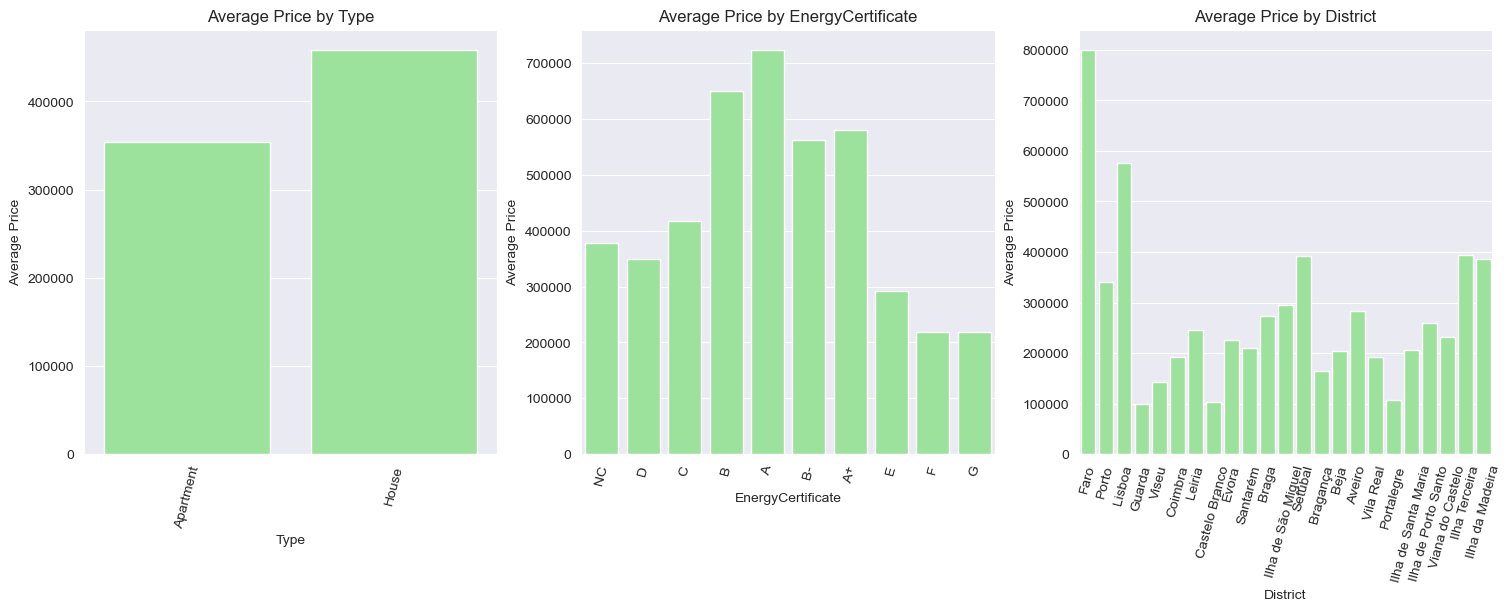

In [ ]:
num_columns = len(categorical_columns)
fig, axes = plt.subplots(1, num_columns, figsize=(5 * num_columns, 6), constrained_layout=True)

for i, col in enumerate(categorical_columns):
    sns.barplot(ax=axes[i], x=col, y='Price', data=df, estimator='mean', errorbar=None, color='lightgreen')
    axes[i].set_title(f'Average Price by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Average Price')
    axes[i].tick_params(axis='x', rotation=75)

plt.show()

In [ ]:
df.groupby('Type')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
Apartment,25592.0,354354.829625,3.476226e+05,600.0,180000.0,250000.0,394718.75,5.950000e+06
House,23500.0,458262.095660,9.020489e+06,2400.0,98000.0,240000.0,450000.00,1.380000e+09


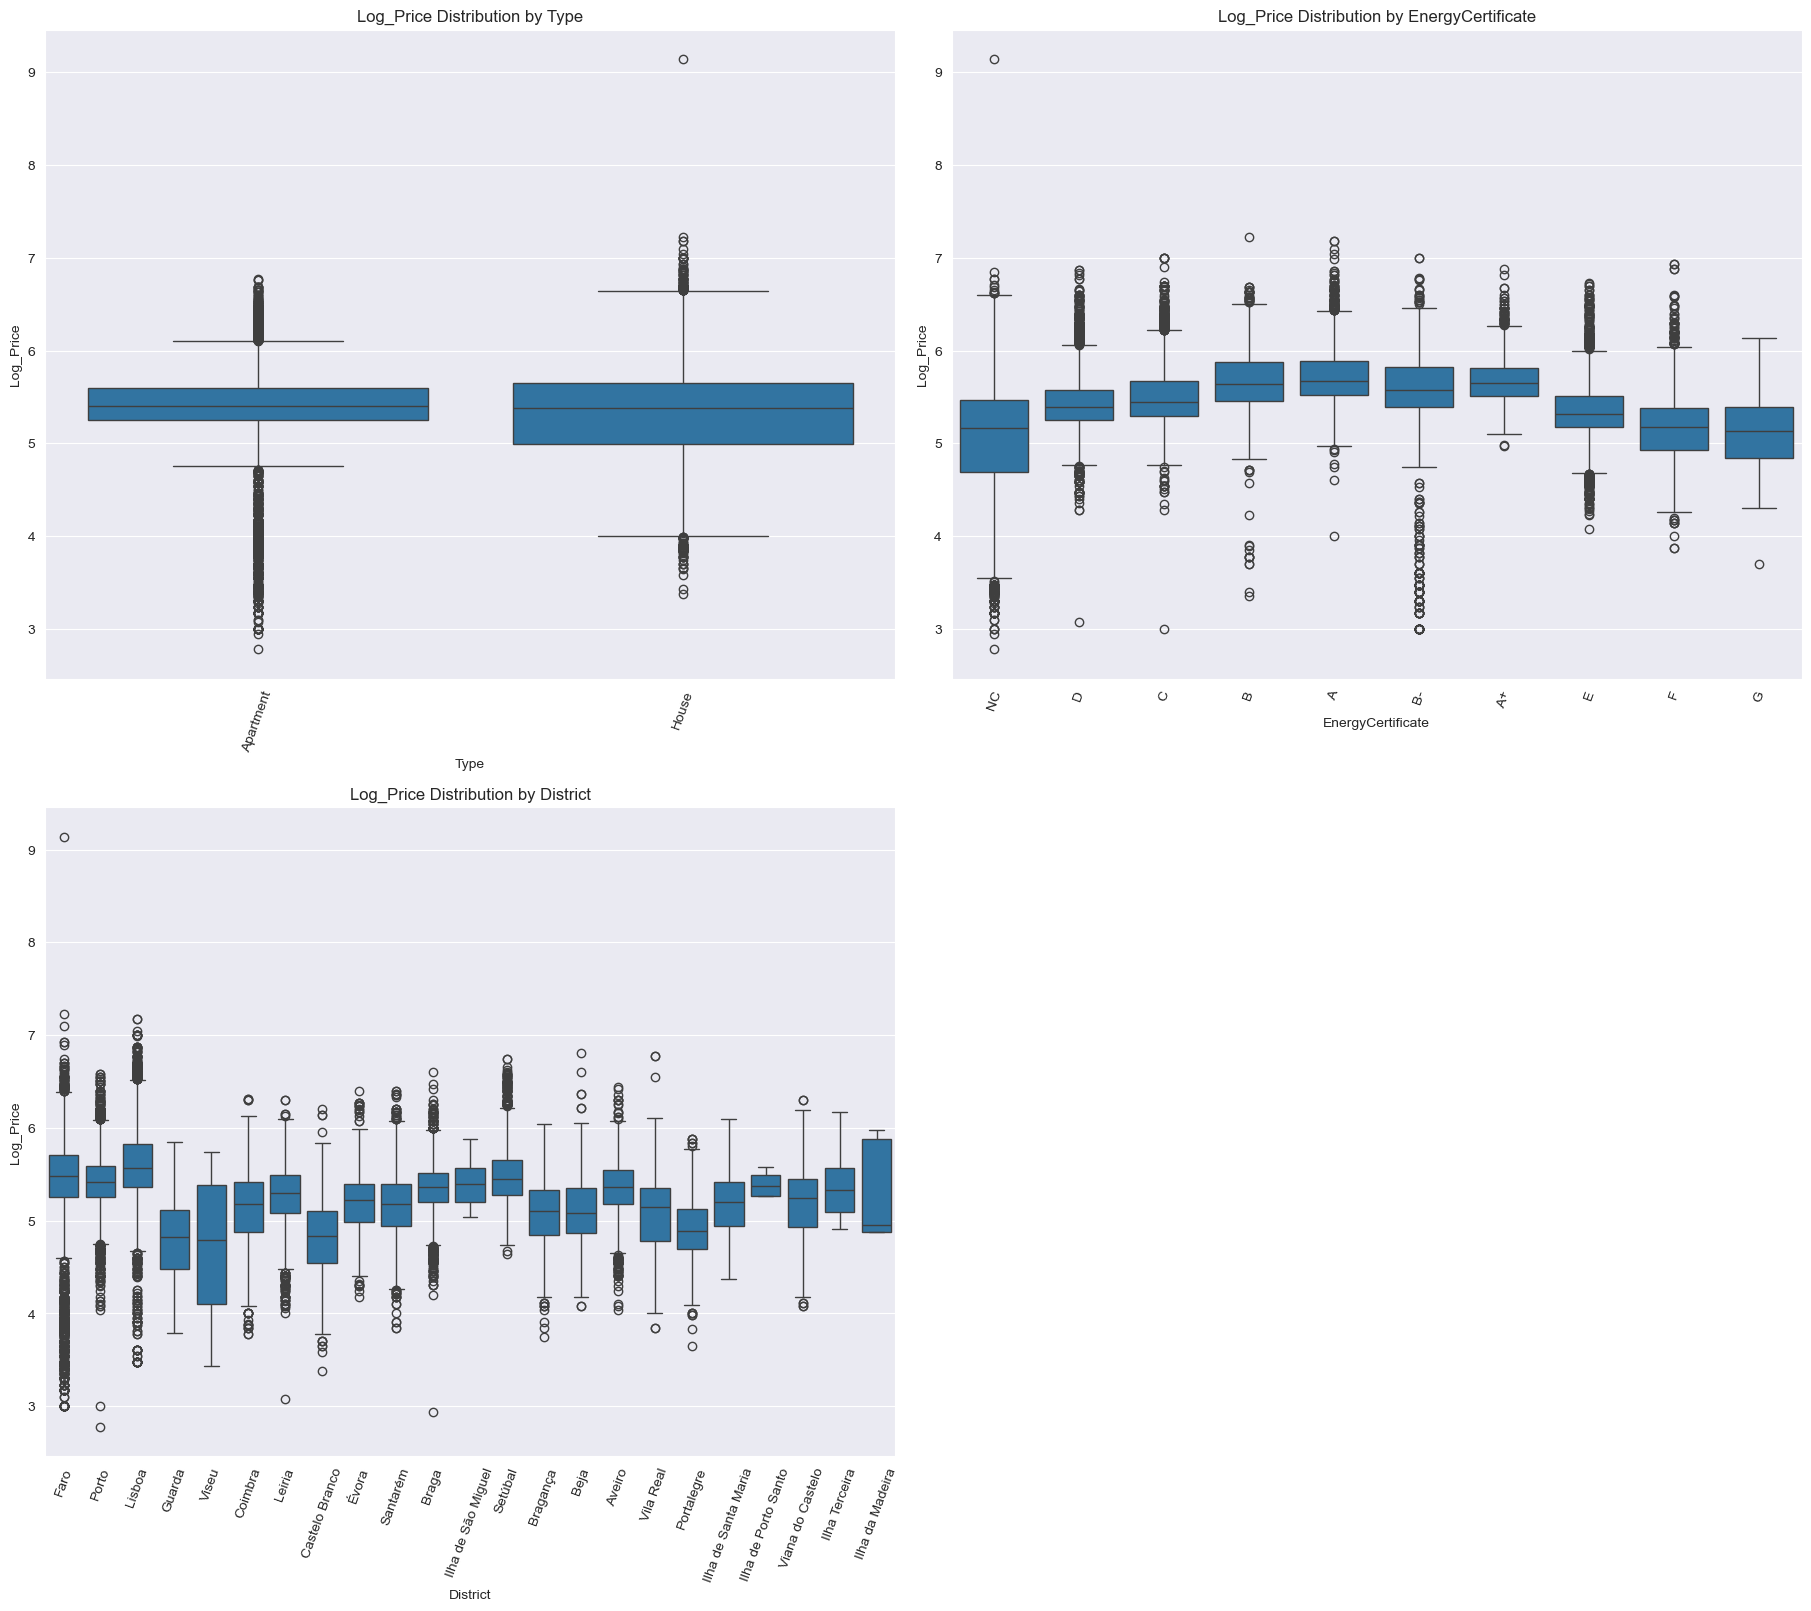

In [ ]:
def plot_categorical_vs_price(dataset, categorical_columns, target_column='Log_Price', figsize=(18, 8), plots_per_row=3):
    num_columns = len(categorical_columns)
    rows = math.ceil(num_columns / plots_per_row)
    fig, axes = plt.subplots(rows, plots_per_row, figsize=(figsize[0], figsize[1] * rows), constrained_layout=True)
    
    axes = axes.flatten()
    
    for i, col in enumerate(categorical_columns):
        sns.boxplot(data=dataset, x=col, y=target_column, ax=axes[i])
        axes[i].set_title(f'{target_column} Distribution by {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel(target_column)
        axes[i].tick_params(axis='x', rotation=70)
    
    
    for j in range(len(categorical_columns), len(axes)):
        fig.delaxes(axes[j])
    
    plt.show()

df['Log_Price'] = np.log10(df['Price'])
plot_categorical_vs_price(df, categorical_columns, target_column='Log_Price', plots_per_row=2)
df.drop('Log_Price', axis=1, inplace=True)

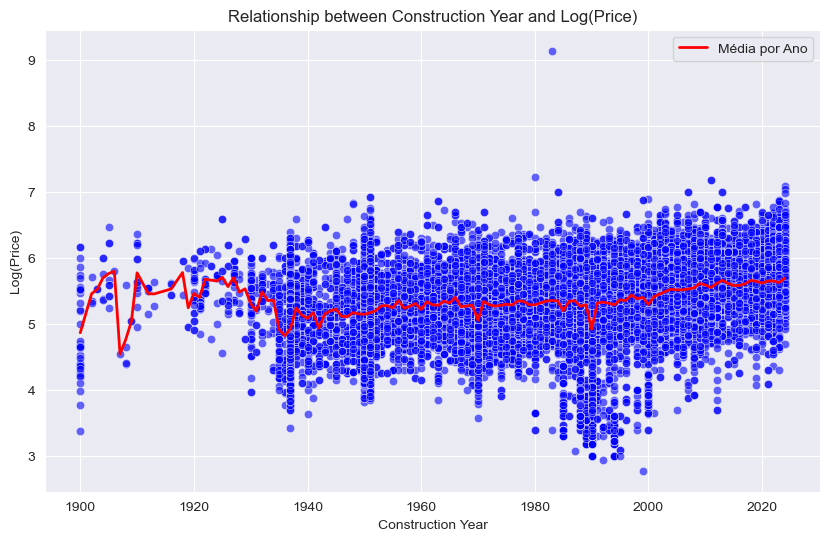

In [ ]:
df['Log_Price'] = np.log10(df['Price'])

mean_log_price_per_year = df.groupby('ConstructionYear')['Log_Price'].mean()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='ConstructionYear', y='Log_Price', data=df, color='blue', alpha=0.6)

plt.plot(mean_log_price_per_year.index, mean_log_price_per_year.values, color='red', label='Média por Ano', linewidth=2)

plt.title('Relationship between Construction Year and Log(Price)')
plt.xlabel('Construction Year')
plt.ylabel('Log(Price)')

plt.legend()
plt.show()

df.drop('Log_Price', axis=1, inplace=True)

In [ ]:
df

,Price,District,City,Town,Type,EnergyCertificate,TotalArea,Parking,ConstructionYear,Elevator,TotalRooms,LivingArea,NumberOfBathrooms
5,9500.0,Faro,Albufeira,Albufeira e Olhos de Água,Apartment,NC,27.0,0.0,1990.0,True,0.0,27.0,1.0
6,158000.0,Faro,Portimão,Portimão,Apartment,D,21953.0,1.0,1993.0,True,1.0,42.0,2.0
7,250000.0,Faro,Loulé,São Clemente,Apartment,C,85.0,0.0,2009.0,True,2.0,85.0,1.0
8,580000.0,Faro,Vila do Bispo,Budens,Apartment,D,84.0,1.0,2003.0,False,2.0,84.0,2.0
9,615000.0,Faro,Loulé,São Clemente,Apartment,D,218.0,2.0,1992.0,True,4.0,218.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74246,714000.0,Setúbal,Almada,Charneca de Caparica e Sobreda,House,A+,159.0,0.0,2018.0,False,4.0,134.0,3.0
74247,240000.0,Setúbal,Seixal,"Seixal, Arrentela e Aldeia de Paio Pires",Apartment,E,111.0,0.0,1992.0,False,4.0,121.0,2.0
74250,140000.0,Viana do Castelo,Ponte da Barca,Vade (São Pedro),Apartment,E,72.0,0.0,1991.0,False,2.0,72.0,1.0
74251,130000.0,Vila Real,Chaves,Madalena e Samaiões,Apartment,NC,65.0,0.0,1988.0,False,3.0,65.0,1.0


##### **Correlation Maps**

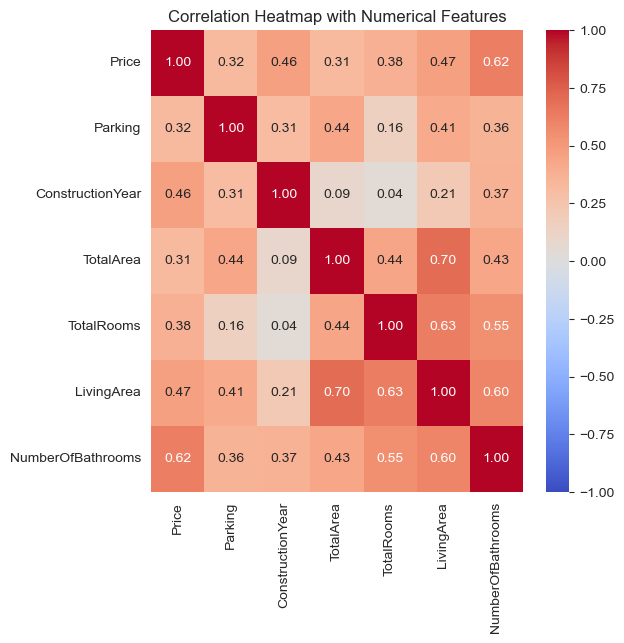

In [ ]:
corr_matrix2 = df[['Price', 'Parking', 'ConstructionYear', 'TotalArea', 'TotalRooms', 'LivingArea', 'NumberOfBathrooms']].corr(method='spearman') 

plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix2, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap with Numerical Features')
plt.show()

- 'LivingArea' is highly correlated to 'TotalArea', should one of them be removed?
- Also, 'LivingArea' has high correlation with 'NumberOfBathrooms' and 'TotalRooms'.

## **2. White-Box Model**

In [52]:
cd

/Users/mafaldaaires


In [53]:
df = pd.read_csv("clean_portugal_listings.csv")

### **Encoding the Data** <a class="anchor" id="section_2_1"></a>

We need to encode the following categorical columns: 'District', 'City', 'Town', 'Type' and 'EnergyCertificate'.

In [54]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler

In [55]:
df.head() 

,Price,District,City,Town,Type,EnergyCertificate,Parking,ConstructionYear,TotalArea,Elevator,TotalRooms,LivingArea,NumberOfBathrooms
0,9500.0,Faro,Albufeira,Albufeira e Olhos de Água,Apartment,NC,0.0,1990.0,27.0,True,0.0,27.0,1.0
1,580000.0,Faro,Vila do Bispo,Budens,Apartment,D,1.0,2003.0,84.0,False,2.0,84.0,2.0
2,350000.0,Faro,Portimão,Portimão,Apartment,C,0.0,1985.0,68.0,True,2.0,68.0,1.0
3,175000.0,Faro,Faro,Faro (Sé e São Pedro),House,NC,0.0,1950.0,78.0,False,4.0,78.0,2.0
4,1485000.0,Faro,Loulé,Quarteira,House,D,2.0,2004.0,472.0,False,4.0,414.0,5.0


In [56]:
y = df['Price']
X = df.drop(columns=['Price'])

In [57]:
# Target Encoding for 'District', 'City' and 'Town'
target_encoder = TargetEncoder(return_df=True, cols=['District', 'City', 'Town'])

In [58]:
encoded_df = target_encoder.fit_transform(X, y)

In [59]:
# Ordinal Encoding for the 'EnergyCertificate' column
ordinal_encoder = OrdinalEncoder(categories=[['A+','A', 'B', 'B-', 'C', 'D', 'E', 'F', 'G', 'NC']])
encoded_df['EnergyCertificate'] = ordinal_encoder.fit_transform(encoded_df[['EnergyCertificate']])

In [60]:
#One-Hot Encoding for 'Type' column
encoded_df = pd.get_dummies(encoded_df, columns=['Type'], drop_first=False, dtype=int)  

In [61]:
encoded_df['Elevator'] = encoded_df['Elevator'].map({True: 1, False: 0})

In [62]:
encoded_df

,District,City,Town,EnergyCertificate,Parking,ConstructionYear,TotalArea,Elevator,TotalRooms,LivingArea,NumberOfBathrooms,Type_Apartment,Type_House
0,453553.844982,269554.769976,242806.613119,9.0,0.0,1990.0,27.0,1,0.0,27.0,1.0,1,0
1,453553.844982,507432.478866,405049.750507,5.0,1.0,2003.0,84.0,0,2.0,84.0,2.0,1,0
2,453553.844982,424096.092896,378333.831615,4.0,0.0,1985.0,68.0,1,2.0,68.0,1.0,1,0
3,453553.844982,661570.833040,438833.422676,9.0,0.0,1950.0,78.0,0,4.0,78.0,2.0,0,1
4,453553.844982,575535.776772,547586.635161,5.0,2.0,2004.0,472.0,0,4.0,414.0,5.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48685,393271.751394,325430.193548,518799.988087,6.0,0.0,2010.0,608.0,0,7.0,269.0,5.0,0,1
48686,393271.751394,342334.504581,399856.363223,9.0,1.0,2023.0,320.0,0,8.0,320.0,4.0,0,1
48687,393271.751394,953761.211361,751299.263053,9.0,1.0,2023.0,75.0,0,3.0,75.0,2.0,1,0
48688,232417.121355,346010.970189,444203.651987,5.0,0.0,2009.0,407.0,0,9.0,407.0,8.0,0,1


Target Encoding: 
- https://www.geeksforgeeks.org/target-encoding-using-nested-cv-in-sklearn-pipeline/
- https://www.rasgoml.com/feature-engineering-tutorials/how-to-do-target-encoding


One-Hot Encoding: https://www.geeksforgeeks.org/ml-one-hot-encoding/#implementing-onehot-encoding-using-python

Ordinal Encoding: https://www.geeksforgeeks.org/how-to-perform-ordinal-encoding-using-sklearn/

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

### **Linear Regression** <a class="anchor" id="section_2_2"></a>

In [64]:
from sklearn.linear_model import LinearRegression

Linear Regression is a Scale-Sensitive Model.

Options:
- Work with other models not sensitive to scale difference
- Transform y to reduce its amplitude => apply the logarithm (log(y)) to compress large values

In [65]:
X_train, X_test, y_train, y_test = train_test_split(encoded_df, y, test_size=0.2, random_state=42)

In [66]:
print(f"({np.min(y)}, {np.max(y)})")

(600.0, 16800000.0)


In [67]:
# Fit model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [68]:
y_pred = model.predict(X_test)

In [69]:
#Error

mae = mean_absolute_error(y_test, y_pred)
print("Erro Absoluto Médio (MAE):", mae)

mse = mean_squared_error(y_test, y_pred)
print("Erro Quadrático Médio (MSE):", mse)

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

Erro Absoluto Médio (MAE): 174816.70407356863
Erro Quadrático Médio (MSE): 139426861637.78348
R2 Score: 0.4646076485882654


The model explains about 29.67% of the variability in y, which is moderate.

### **Decision Tree** <a class="anchor" id="section_2_2"></a>

In [70]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [71]:
X_train, X_test, y_train, y_test = train_test_split(encoded_df, y, test_size=0.2, random_state=42)

In [72]:
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [73]:
y_pred_dt = dt.predict(X_test)

In [74]:
# Error
mae = mean_absolute_error(y_test, y_pred_dt)
print("Erro Absoluto Médio (MAE):", mae)

mse = mean_squared_error(y_test, y_pred_dt)
print("Erro Quadrático Médio (MSE):", mse)

r2 = r2_score(y_test, y_pred_dt)
print("R2 Score:", r2)

Erro Absoluto Médio (MAE): 105888.07700351541
Erro Quadrático Médio (MSE): 102107806948.20267
R2 Score: 0.60791099923403


In [75]:
feature_importances = pd.Series(dt.feature_importances_, index=encoded_df.columns)

feature_importances

District             0.012818
City                 0.056738
Town                 0.292126
EnergyCertificate    0.037062
Parking              0.009527
ConstructionYear     0.049836
TotalArea            0.060020
Elevator             0.005859
TotalRooms           0.024753
LivingArea           0.202846
NumberOfBathrooms    0.246377
Type_Apartment       0.000708
Type_House           0.001328
dtype: float64

In [76]:
feature_names = encoded_df.columns

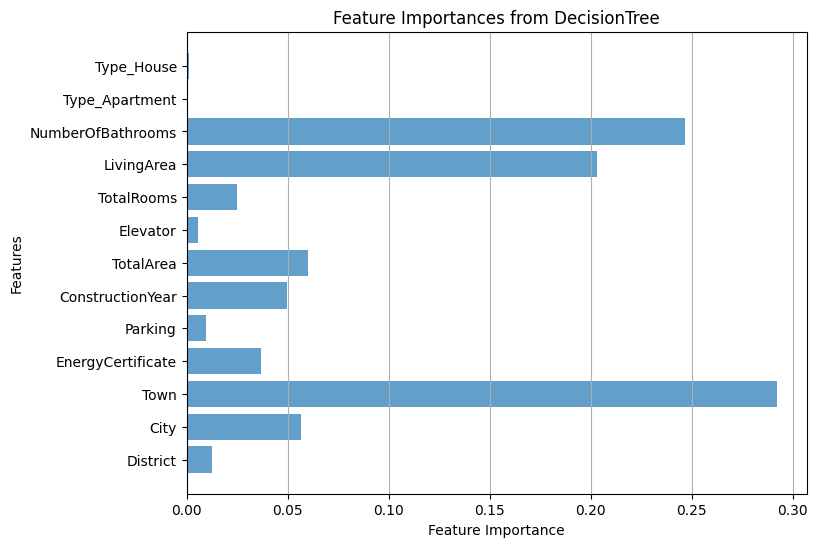

In [77]:
plt.figure(figsize=(8,6))
plt.barh(feature_names, dt.feature_importances_, align='center', alpha=0.7)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importances from DecisionTree")
plt.grid(axis="x")
plt.show()

## **3. Black-Box Model**

In [78]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay

In [79]:
feature_names = encoded_df.columns

In [80]:
black_model = RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42)
black_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=50, random_state=42)

In [81]:
y_pred_rf = black_model.predict(X_test)

In [82]:
# Error
mae = mean_absolute_error(y_test, y_pred_rf)
print("Erro Absoluto Médio (MAE):", mae)

mse = mean_squared_error(y_test, y_pred_rf)
print("Erro Quadrático Médio (MSE):", mse)

r2 = r2_score(y_test, y_pred_rf)
print("R2 Score:", r2)

Erro Absoluto Médio (MAE): 130572.13476562095
Erro Quadrático Médio (MSE): 86616861647.09901
R2 Score: 0.6673954739824806


### **Simplification-Based Techniques**<a class="anchor" id="section_3_1"></a>

##### Global Surrogates

In [83]:
# Comparar a performance entre o modelo complexo e o modelo surrogate
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"RMSE do modelo black-box (Random Forest): {rmse_rf}")
print(f"R² do modelo black-box (Random Forest): {r2_rf}")

RMSE do modelo black-box (Random Forest): 294307.42710149026
R² do modelo black-box (Random Forest): 0.6673954739824806


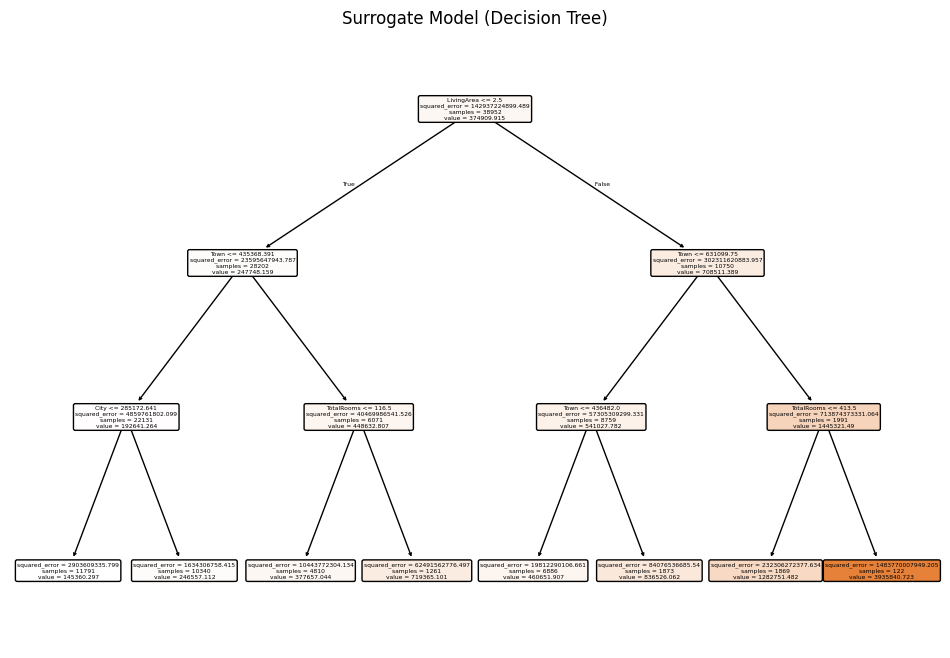

In [84]:
# Train the surrogate model on X_train using predictions from the black-box model
surrogate_model = DecisionTreeRegressor(max_depth=3, random_state=42)
surrogate_model.fit(X_train, black_model.predict(X_train))

# Evaluate the surrogate model on the test set
surrogate_predictions = surrogate_model.predict(X_test)

# Visualize the surrogate model (Decision Tree)
plt.figure(figsize=(12, 8))
plot_tree(surrogate_model, feature_names=X.columns, filled=True, rounded=True)
plt.title("Surrogate Model (Decision Tree)")
plt.show()

In [85]:
# Compare surrogate predictions to black-box model predictions on X_test
rmse_sm = np.sqrt(mean_squared_error(y_pred_rf, surrogate_predictions))
r2_sm = r2_score(y_pred_rf, surrogate_predictions)

print(f"RMSE do modelo surrogate (Árvore de Decisão): {rmse}")
print(f"R² do modelo surrogate (Árvore de Decisão): {r2}")

RMSE do modelo surrogate (Árvore de Decisão): 166233.69780371938
R² do modelo surrogate (Árvore de Decisão): 0.6673954739824806


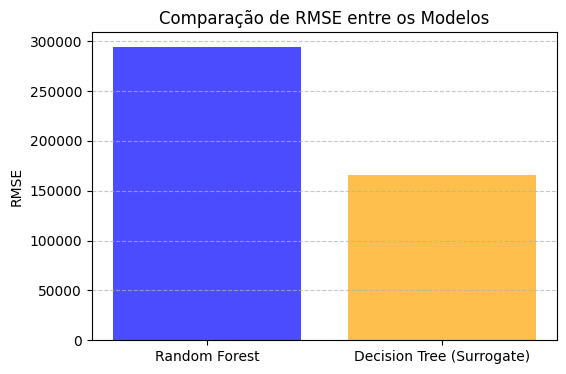

In [86]:
# Dados para RMSE
metrics_rmse = ['Random Forest', 'Decision Tree (Surrogate)']
values_rmse = [rmse_rf, rmse_sm]

# Criar o gráfico de barras para RMSE
plt.figure(figsize=(6, 4))
plt.bar(metrics_rmse, values_rmse, color=['blue', 'orange'], alpha=0.7)

# Configurações do gráfico
plt.ylabel('RMSE')
plt.title('Comparação de RMSE entre os Modelos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

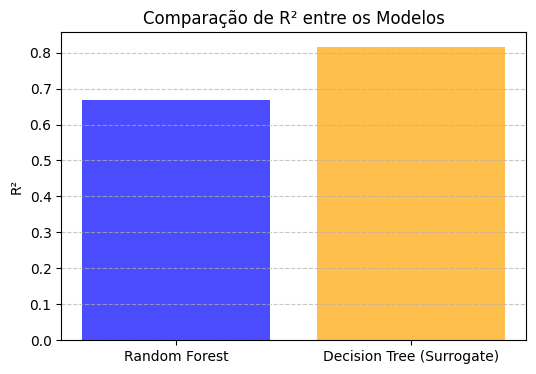

In [87]:
# Dados para R²
metrics_r2 = ['Random Forest', 'Decision Tree (Surrogate)']
values_r2 = [r2_rf, r2_sm]

# Criar o gráfico de barras para R²
plt.figure(figsize=(6, 4))
plt.bar(metrics_r2, values_r2, color=['blue', 'orange'], alpha=0.7)

# Configurações do gráfico
plt.ylabel('R²')
plt.title('Comparação de R² entre os Modelos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

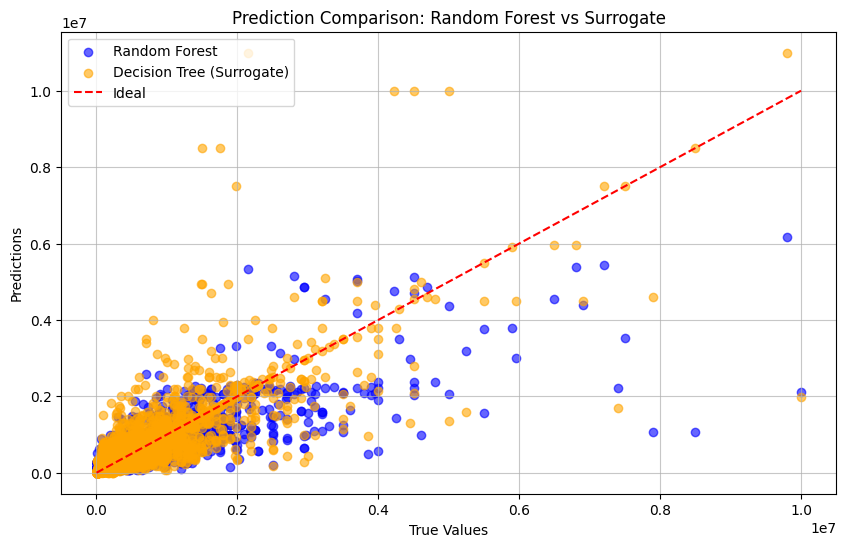

In [88]:
# Comparação de previsões
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, label='Random Forest', color='blue')
plt.scatter(y_test, y_pred_dt, alpha=0.6, label='Decision Tree (Surrogate)', color='orange')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal')

# Configurações do gráfico
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Prediction Comparison: Random Forest vs Surrogate')
plt.legend()
plt.grid(alpha=0.7)
plt.show()

### **Feature-Based Techniques** <a class="anchor" id="section_3_2"></a>

##### **Partial Dependence Plots (PDPs)**

<div style="font-size: small">
1-way Partial Dependence Plots (PDPs)
</div>

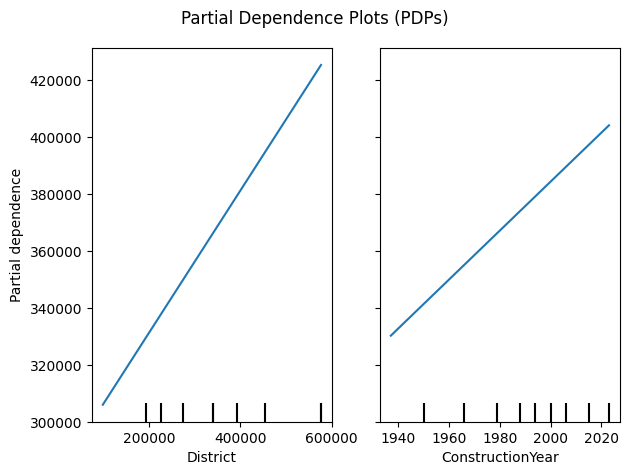

In [89]:
# Step 4: Generate PDPs for Selected Features
# Choose the features for which you want to generate PDPs
selected_features = [0, 5]  

# Generate PDPs
PartialDependenceDisplay.from_estimator(
    model,
    X_train,
    selected_features,
    feature_names=feature_names,
    grid_resolution=50,
)

# Display the plot
plt.suptitle("Partial Dependence Plots (PDPs)")
plt.tight_layout()
plt.show()

#### **Feature Importance**

##### SHapley Additive exPlanations (SHAP)

In [91]:
! pip install shap

  Using cached cloudpickle-3.1.0-py3-none-any.whl.metadata (7.0 kB)
Using cached cloudpickle-3.1.0-py3-none-any.whl (22 kB)


In [92]:
import shap

In [94]:
explainer = shap.TreeExplainer(black_model)

In [95]:
shap_values = explainer.shap_values(X_test)

In [96]:
# X_test_sample = X_test.sample(n=100, random_state=42)  # Seleciona 100 instâncias
# shap_values = explainer.shap_values(X_test_sample)

In [97]:
print(shap_values.shape)

(9738, 13)


In [98]:
print(shap_values[10,:])

[ 4.21565711e+03  1.35426900e+05  6.64633675e+05  9.42468091e+03
  8.41106942e+01  7.56332626e+04 -9.65090939e+02  3.33109477e+02
 -1.06687386e+02  3.44222575e+05 -5.11348940e+04  0.00000000e+00
  0.00000000e+00]


In [99]:
# Choose an instance to explain
instance_index = 32
instance = X_test.iloc[instance_index]
print(instance)

District             204531.945607
City                 248795.188932
Town                 225097.332929
EnergyCertificate         6.000000
Parking                   0.000000
ConstructionYear       1971.000000
TotalArea               116.000000
Elevator                  0.000000
TotalRooms                4.000000
LivingArea              116.000000
NumberOfBathrooms         2.000000
Type_Apartment            0.000000
Type_House                1.000000
Name: 35066, dtype: float64


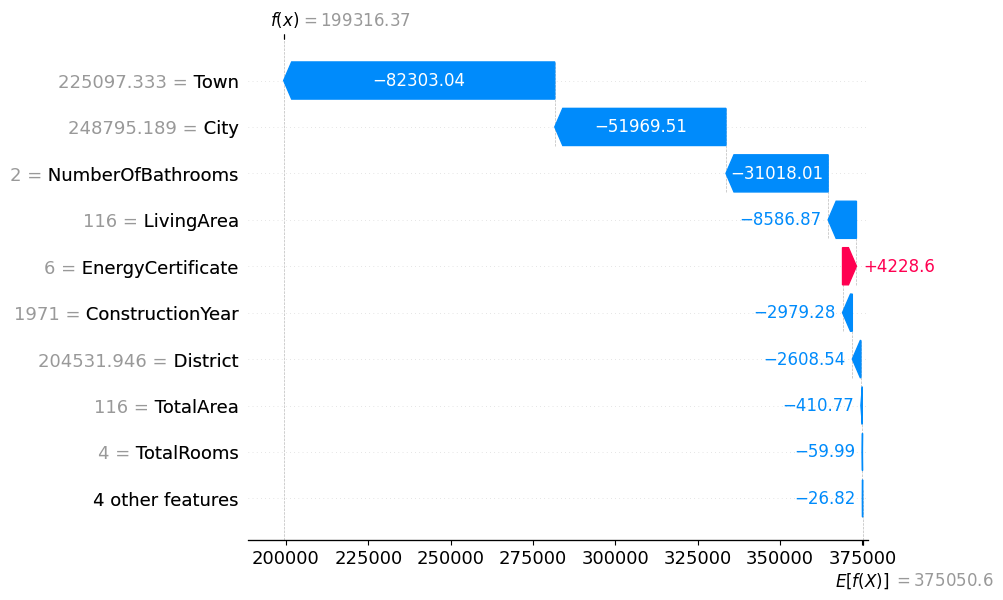

In [101]:
features = encoded_df.columns
# Create a waterfall plot for the selected instance
shap.waterfall_plot(
    shap.Explanation(
       values=shap_values[instance_index,:],  # SHAP values for the positive class (Survived = 1)
       base_values=explainer.expected_value,  # Base value for the positive class
       data=instance.values,  # Feature values for the instance
       feature_names=features  # Feature names
   )
)

In [107]:
# Create a force plot for the selected instance
shap.force_plot(
   shap.Explanation(
       values=shap_values[instance_index,:],  # SHAP values for the positive class (Survived = 1)
       base_values=explainer.expected_value,  # Base value for the positive class
       data=instance.values,  # Feature values for the instance
       feature_names=features  # Feature names
   )
)

In [108]:
print(shap_values[:,1])

[ 17325.06601434 -57020.15203751 -57023.46339936 ...  -5766.20888411
 -31154.68592547   1416.46440071]


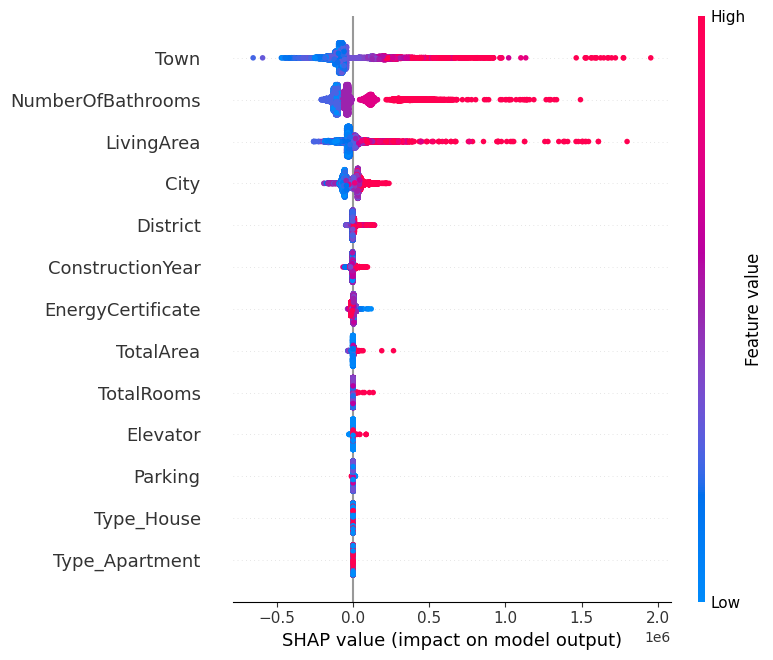

In [109]:
# Generate a beeswarm plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, feature_names=features)

Resolver o shap

A. Reduzir o Tamanho de X_test:
X_test_sample = X_test.sample(n=100, random_state=42)  # Seleciona 100 instâncias
shap_values = explainer.shap_values(X_test_sample)

B. Limitar o Número de Árvores ou a Profundidade das Árvores:
rf_model = RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

C. Usar approximate=True no TreeExplainer:
explainer = shap.TreeExplainer(rf_model, approximate=True)
shap_values = explainer.shap_values(X_test)

D. Testar em uma Instância Específica:
instance_index = 0
shap_values = explainer.shap_values(X_test.iloc[instance_index])


### **Example-Based Technique** <a class="anchor" id="section_3_3"></a>